In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('TRAIN.csv')
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [6]:
df.shape

(71236, 48)

In [7]:
df.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [8]:
df.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
lb = LabelEncoder()

In [11]:
df['gender'] = lb.fit_transform(df['gender'])
df['age'] = lb.fit_transform(df['age'])
df['weight'] = lb.fit_transform(df['weight'])
df['payer_code'] = lb.fit_transform(df['payer_code'])
df['medical_specialty'] = lb.fit_transform(df['medical_specialty'])
df['diag_1'] = lb.fit_transform(df['diag_1'])
df['diag_2'] = lb.fit_transform(df['diag_2'])
df['diag_3'] = lb.fit_transform(df['diag_3'])
df['max_glu_serum'] = lb.fit_transform(df['max_glu_serum'])
df['A1Cresult'] = lb.fit_transform(df['A1Cresult'])
df['metformin'] = lb.fit_transform(df['metformin'])
df['repaglinide'] = lb.fit_transform(df['repaglinide'])
df['nateglinide'] = lb.fit_transform(df['nateglinide'])
df['chlorpropamide'] = lb.fit_transform(df['chlorpropamide'])
df['glimepiride'] = lb.fit_transform(df['glimepiride'])
df['acetohexamide'] = lb.fit_transform(df['acetohexamide'])
df['glipizide'] = lb.fit_transform(df['glipizide'])
df['glyburide'] = lb.fit_transform(df['glyburide'])
df['tolbutamide'] = lb.fit_transform(df['tolbutamide'])
df['pioglitazone'] = lb.fit_transform(df['pioglitazone'])
df['rosiglitazone'] = lb.fit_transform(df['rosiglitazone'])
df['acarbose'] = lb.fit_transform(df['acarbose'])
df['miglitol'] = lb.fit_transform(df['miglitol'])
df['troglitazone'] = lb.fit_transform(df['troglitazone'])
df['tolazamide'] = lb.fit_transform(df['tolazamide'])
df['examide'] = lb.fit_transform(df['examide'])
df['citoglipton'] = lb.fit_transform(df['citoglipton'])
df['insulin'] = lb.fit_transform(df['insulin'])
df['glyburide-metformin'] = lb.fit_transform(df['glyburide-metformin'])
df['glipizide-metformin'] = lb.fit_transform(df['glipizide-metformin'])
df['glimepiride-pioglitazone'] = lb.fit_transform(df['glimepiride-pioglitazone'])
df['metformin-pioglitazone'] = lb.fit_transform(df['metformin-pioglitazone'])
df['metformin-rosiglitazone'] = lb.fit_transform(df['metformin-rosiglitazone'])
df['change'] = lb.fit_transform(df['change'])
df['diabetesMed'] = lb.fit_transform(df['diabetesMed'])


In [12]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kmeans = KMeans(n_clusters = 3)

In [14]:
df.dtypes

race                        object
gender                       int32
age                          int32
weight                       int32
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                   int32
medical_specialty            int32
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                       int32
diag_2                       int32
diag_3                       int32
number_diagnoses             int64
max_glu_serum                int32
A1Cresult                    int32
metformin                    int32
repaglinide                  int32
nateglinide                  int32
chlorpropamide               int32
glimepiride                  int32
acetohexamide                int32
glipizide           

In [26]:
p = df.iloc[:,1:-1]
q = df.iloc[:,-1]
print(p.shape,q.shape)
print(type(p),type(q))

(71236, 46) (71236,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [27]:
kmeans.fit_predict(p)

array([1, 0, 1, ..., 0, 1, 0])

In [28]:
p["readmitted_NO"] = kmeans.labels_

In [29]:
p.head(11)

,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,0,0,1,6,25,1,1,0,35,41,...,0,1,1,0,0,0,0,1,0,1
1,0,1,1,1,1,7,3,0,0,59,...,0,3,1,0,0,0,0,0,1,0
2,0,2,1,1,1,7,2,0,0,11,...,0,1,1,0,0,0,0,1,1,1
3,1,3,1,1,1,7,2,0,0,44,...,0,3,1,0,0,0,0,0,1,2
4,1,4,1,1,1,7,1,0,0,51,...,0,2,1,0,0,0,0,0,1,0
5,1,5,1,2,1,2,3,0,0,31,...,0,2,1,0,0,0,0,1,1,0
6,1,6,1,3,1,2,4,0,0,70,...,0,2,1,0,0,0,0,0,1,1
7,1,7,1,1,1,7,5,0,0,73,...,0,1,1,0,0,0,0,1,1,0
8,0,8,1,2,1,4,13,0,0,68,...,0,2,1,0,0,0,0,0,1,0
9,0,9,1,3,3,4,12,0,17,33,...,0,2,1,0,0,0,0,0,1,0


In [30]:
q.head(11)

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    0
Name: readmitted_NO, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
p_tr,p_te,q_tr,q_te = train_test_split(p,q,test_size=0.20)
print(p_tr.shape)
print(p_te.shape)
print(q_tr.shape)
print(q_te.shape)

(56988, 47)
(14248, 47)
(56988,)
(14248,)


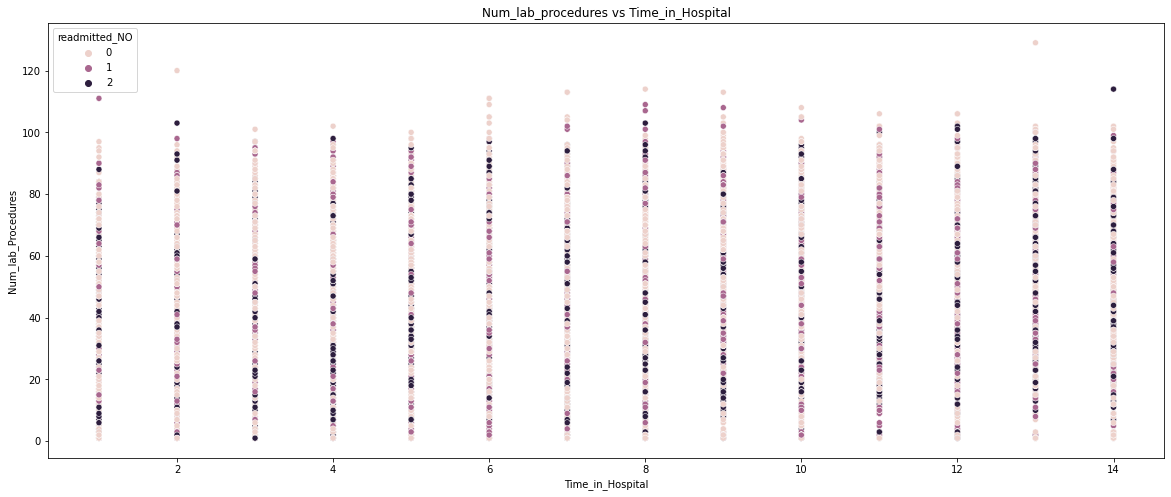

In [35]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "time_in_hospital", y = "num_lab_procedures", data = p, hue = "readmitted_NO")
plt.title("Num_lab_procedures vs Time_in_Hospital")
plt.xlabel("Time_in_Hospital")
plt.ylabel("Num_lab_Procedures")
plt.show()

In [36]:
kmeans.inertia_

3057488502.014615

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
def apply_model(model):
    model.fit(p_tr,q_tr)
    print('Accuracy',model.score(p_te,q_te))
    qpred = model.predict(p_te)
    print('Predicted values\n',qpred)
    cm = confusion_matrix(q_te,qpred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(q_te,qpred))

C:\Users\bidyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.5979084783829309
Predicted values
 [1 1 1 ... 1 0 0]
Confusion Matrix
 [[3432 3374]
 [2355 5087]]


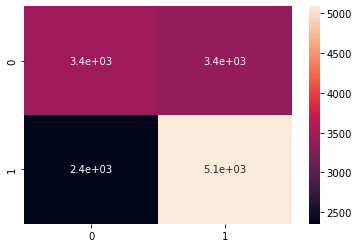

Classification report
               precision    recall  f1-score   support

           0       0.59      0.50      0.55      6806
           1       0.60      0.68      0.64      7442

    accuracy                           0.60     14248
   macro avg       0.60      0.59      0.59     14248
weighted avg       0.60      0.60      0.59     14248



In [39]:
# 1) LogReg
m1 = LogisticRegression()
apply_model(m1)

Accuracy 0.6258422234699607
Predicted values
 [1 1 1 ... 1 0 0]
Confusion Matrix
 [[3261 3545]
 [1786 5656]]


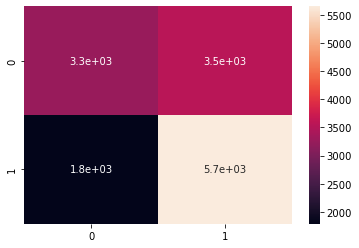

Classification report
               precision    recall  f1-score   support

           0       0.65      0.48      0.55      6806
           1       0.61      0.76      0.68      7442

    accuracy                           0.63     14248
   macro avg       0.63      0.62      0.61     14248
weighted avg       0.63      0.63      0.62     14248



In [40]:
# 2) Decision Tree
m2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m2)

Accuracy 0.6279477821448625
Predicted values
 [1 1 1 ... 1 0 0]
Confusion Matrix
 [[3211 3595]
 [1706 5736]]


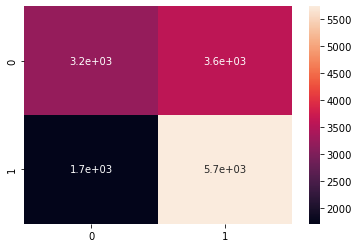

Classification report
               precision    recall  f1-score   support

           0       0.65      0.47      0.55      6806
           1       0.61      0.77      0.68      7442

    accuracy                           0.63     14248
   macro avg       0.63      0.62      0.62     14248
weighted avg       0.63      0.63      0.62     14248



In [41]:
# 3) Random Forest
m3 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m3)

Accuracy 0.5409180235822572
Predicted values
 [1 1 1 ... 1 1 0]
Confusion Matrix
 [[3236 3570]
 [2971 4471]]


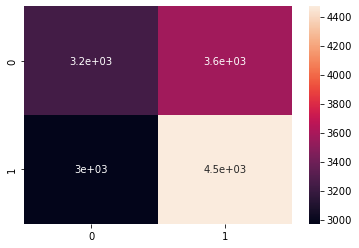

Classification report
               precision    recall  f1-score   support

           0       0.52      0.48      0.50      6806
           1       0.56      0.60      0.58      7442

    accuracy                           0.54     14248
   macro avg       0.54      0.54      0.54     14248
weighted avg       0.54      0.54      0.54     14248



In [42]:
# 4) KNN
m4 = KNeighborsClassifier(n_neighbors=27)
apply_model(m4)

In [48]:
print("The model with the best accuracy is 'Random Forest' with an accuracy of 0.6279477821448625 !!!")

The model with the best accuracy is 'Random Forest' with an accuracy of 0.6279477821448625 !!!
